# 캘리포니아 집값 예측( 지도학습 )
- 캘리포니아의 집 값을 예측하는 회귀 모델을 생성하자
1. ~~분류~~ _회귀_
2. 전처리(클리닝)
    1. 데이터 로드
    2. 데이터 확인
3. 데이터 나누기
    1. 후반 전처리
4. Baseline (Linear Modeling)
5. 개선

## 데이터 로드

In [36]:
# import를 한곳에 모으는것이 고치기에도 편하고 작업 오버뷰를 대략 알 수 있다
# 데이터 처리 및 시각화
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 왜도 및 데이터의 편증을 해결하기 위해 필요
from scipy.stats import skew

# 3장 비지도 학습에서의 "전처리 기법"
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv("./data/housing.csv")
# pd.read_sql("SELECT * FROM...
data.head()
# drop data such as refresh token or unrelated data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.keys()
data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


회귀는 무조건 숫자 , 분류는 String관계 없음 <br>
total_bedrooms: 데이타 결측치 <br>
ocean_proximity: 숫자화 해야함 <br>

## 전처리

In [5]:
for x in data.total_bedrooms:
    if x==0:
        print(x)

### 결측치 채우기

In [6]:
# null 갯수 체크
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


(-5000.0, 20000.0)

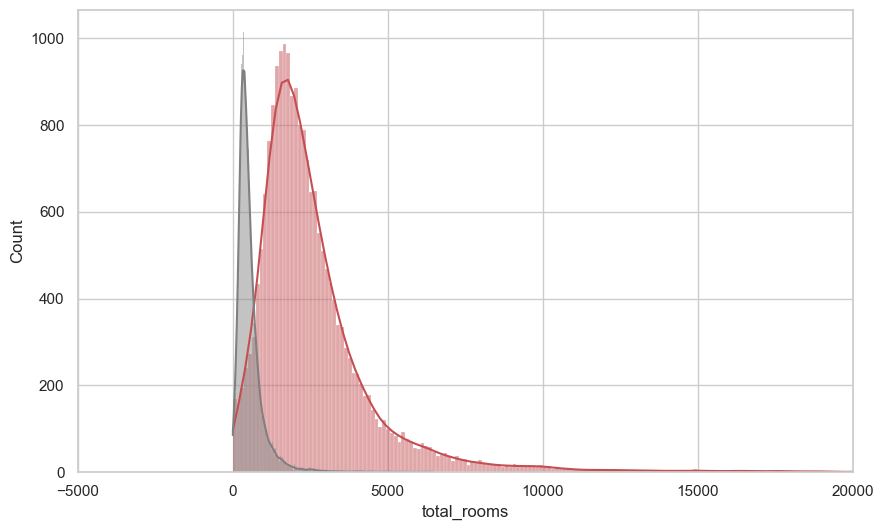

In [8]:
# 어떠한 값으로 채워야하는지 분석을 위한 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(10,6)) # figure 크기 지정
sns.histplot(data["total_rooms"], kde=True, color="r")
sns.histplot(data["total_bedrooms"], kde=True, color="grey")
plt.xlim(-5000,20000)

In [9]:
# null 값 중위값으로 변경: 잘린 데이터가 많은 관계로 평균 사용 불가
data["total_bedrooms"].fillna(data["total_bedrooms"].median(), inplace=True)

In [10]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
data["total_bedrooms"].median()

435.0

### 데이터 경향 분석

<Axes: >

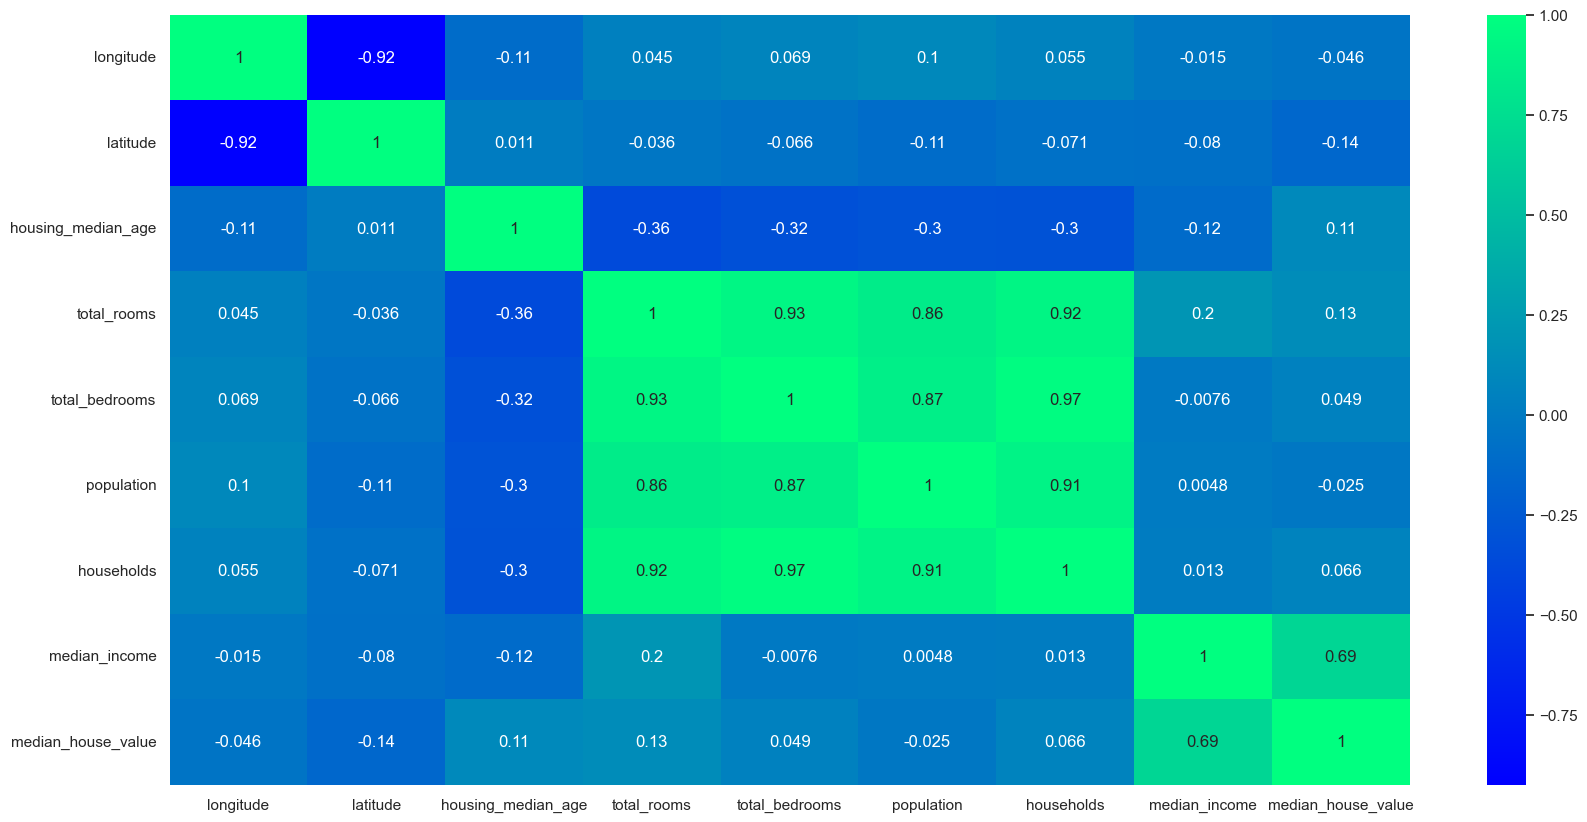

In [12]:
# 연관 관계
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="winter")

<Axes: xlabel='median_house_value', ylabel='Count'>

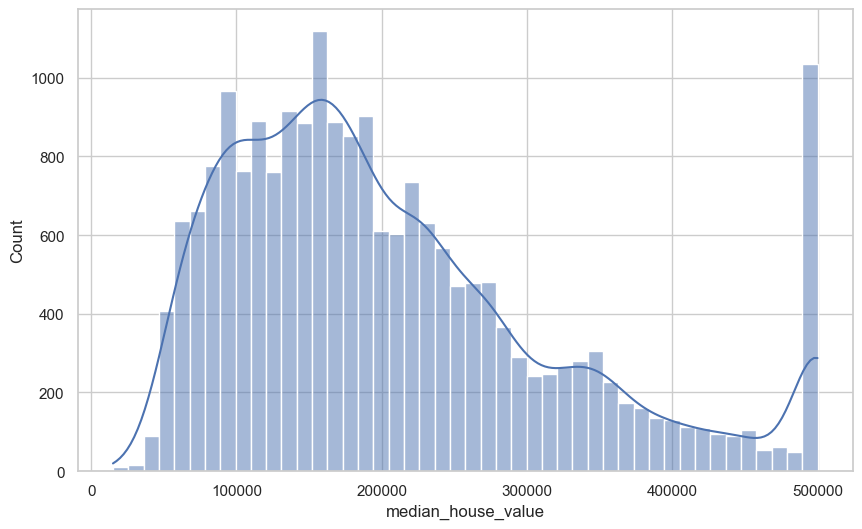

In [13]:
# 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data["median_house_value"], kde=True, color="b")


두개의 밀집 군단

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

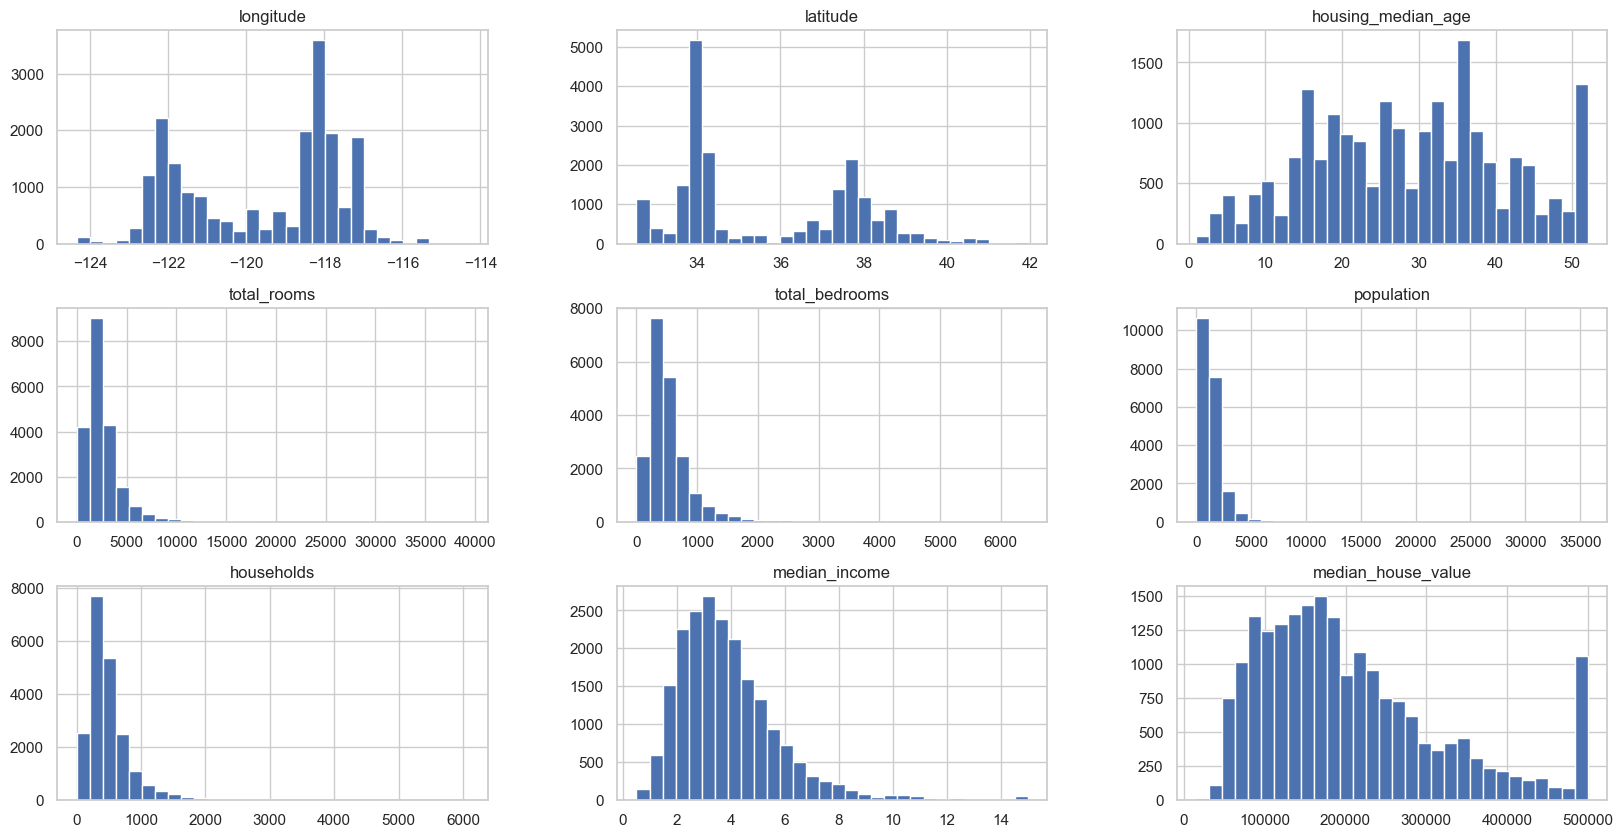

In [14]:
# 대략의 분포와 경향성 확인
data.hist(bins=30, figsize=(20,10))

#### 데이터 분석 결과
- 데이터의 왜도가 심함
- 집값과 소득의 상관관계가 높음

### 범주형 데이터 확인
숫자로 측정하고 표시하는 것이 불가능한 자료

<Axes: xlabel='ocean_proximity', ylabel='count'>

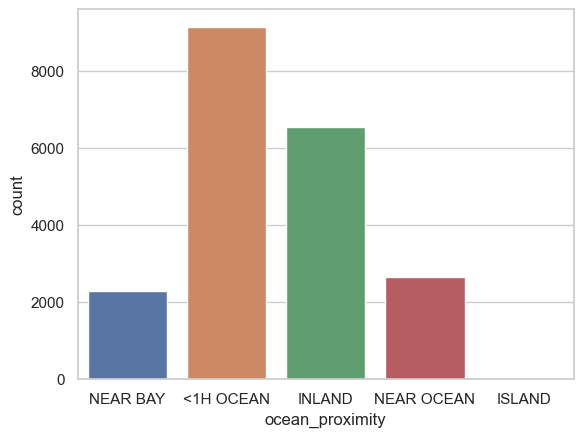

In [15]:
sns.countplot( x = data["ocean_proximity"])

## 특성 공학

In [16]:
data["bed_per_room"] = data["total_bedrooms"]/data["total_rooms"]

In [17]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096


### 데이터 나누기

In [18]:
X = data.drop(["median_house_value"],axis=1)
# 아래에서 log scale을 사용하려면 target 값도 log scale로 치환해줘야한다
y = np.log(data["median_house_value"])

#### 데이터 왜도가 심할떄

In [19]:
#from scipy.stats import skew : 왜도를 구해줌
#숫자로 된 값만 가져와서 column 명을 Features로
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns=["Features"])
#skew_df의 Features항의 X값들의 왜도를 구해서 Skew 밑에 저장
skew_df["Skew"] = skew_df["Features"].apply(lambda features: skew(X[features]))
skew_df["Abs_Skew"] = skew_df["Skew"].apply(abs)
# 왜도인지 아닌지 판명
skew_df["Skewd"] = skew_df["Abs_Skew"].apply(lambda X: True if X>0.5 else False)

In [20]:
skew_columns = skew_df[skew_df["Abs_Skew"]>0.5]["Features"].values
skew_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

In [21]:
# 아래에서 log scale을 사용하려면 target 값도 log scale로 치환해줘야한다
for column in skew_columns:
    X[column] = np.log(X[column])

In [22]:
skew_df

,Features,Skew,Abs_Skew,Skewd
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.480888,3.480888,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,bed_per_room,6.316445,6.316445,True


#### Encoding

In [26]:
# 범주에 있는 Object를 숫자로 치환
encoder = LabelEncoder()
X["ocean_proximity"] = encoder.fit_transform(X["ocean_proximity"])

In [27]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,3,-1.920110
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,3,-1.859204
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,3,-2.043951
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,3,-1.690331
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,3,-1.759704


In [31]:
scaler = StandardScaler() # 컬럼 당 minmax 가 다 다름
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index = X.index, columns= X.columns)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.267645 -1.367976            0.346478     0.557448        0.534421   
8267    0.703627 -0.871699            1.617807     0.662187        0.846155   
17445  -0.454356 -0.455012           -1.957806    -0.107181       -0.341781   
14265   1.227714 -1.377340            0.584852    -0.491620       -0.200175   
2271   -0.114948  0.537543            1.141059     0.195762        0.020301   
...          ...       ...                 ...          ...             ...   
11284   0.803453 -0.867017            0.505394    -0.579684       -1.025942   
11964   1.067992 -0.754652            0.346478     0.539449        0.403696   
5390    0.593818 -0.749970            0.584852     0.028731        0.401287   
860    -1.193070  0.912092           -1.083767     0.736035        0.467173   
15795  -1.422670  1.001048            1.856182     0.958639        1.550273   

       population  households  median_income  ocean

## 모델 생성
rmse는 낮을수록 좋고 r2는 높을수록 좋다

### 선형모델

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_lr))
r2 = r2_score(y_test,predictions_lr)
print(rmse,r2)

0.3444308549750826 0.6344883264077854


### KNN

In [39]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [40]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_knn))
r2 = r2_score(y_test,predictions_knn)
print(rmse,r2)

0.29601285396707333 0.7300282680211424


### RandomForest

In [41]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

In [42]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_rf))
r2 = r2_score(y_test,predictions_rf)
print(rmse,r2)

0.23354930181092184 0.8319438929450302


In [45]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions_rf))
r2 = r2_score(y_test,predictions_rf)
print(rmse,r2)

0.23375158672383123 0.8316526487673266


### GradientBoostingRegressor

In [43]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions_gbr = gbr.predict(X_test)

In [44]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_gbr))
r2 = r2_score(y_test,predictions_gbr)
print(rmse,r2)

0.26771076075476546 0.7791848794474099


### 유행 모델

#### CatBoost

In [48]:
# !pip install catboost xgboost lightgbm

In [49]:
from catboost import CatBoostRegressor

In [51]:
catboost= CatBoostRegressor()
catboost.fit(X_train, y_train)
predictions_catboost = catboost.predict(X_test)

Learning rate set to 0.063766
0:	learn: 0.5477066	total: 2.78ms	remaining: 2.78s
1:	learn: 0.5272182	total: 5.3ms	remaining: 2.65s
2:	learn: 0.5082013	total: 7.96ms	remaining: 2.64s
3:	learn: 0.4912890	total: 10.7ms	remaining: 2.66s
4:	learn: 0.4750285	total: 13.5ms	remaining: 2.69s
5:	learn: 0.4605128	total: 16.4ms	remaining: 2.71s
6:	learn: 0.4475175	total: 19.6ms	remaining: 2.78s
7:	learn: 0.4353580	total: 22.3ms	remaining: 2.76s
8:	learn: 0.4240331	total: 25ms	remaining: 2.75s
9:	learn: 0.4146684	total: 27.7ms	remaining: 2.75s
10:	learn: 0.4052256	total: 30.3ms	remaining: 2.73s
11:	learn: 0.3969183	total: 32.9ms	remaining: 2.71s
12:	learn: 0.3896859	total: 34.8ms	remaining: 2.64s
13:	learn: 0.3833644	total: 36.7ms	remaining: 2.58s
14:	learn: 0.3761449	total: 38.5ms	remaining: 2.53s
15:	learn: 0.3707153	total: 40.3ms	remaining: 2.48s
16:	learn: 0.3645221	total: 42.1ms	remaining: 2.43s
17:	learn: 0.3598349	total: 44.6ms	remaining: 2.43s
18:	learn: 0.3544757	total: 47ms	remaining: 2.4

In [56]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_catboost))
r2 = r2_score(y_test,predictions_catboost)
print(rmse,r2)

0.2205112504809162 0.8501838416230987


#### XGBoost

In [53]:
from xgboost import XGBRegressor

In [65]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
predictions_xgb = xgb.predict(X_test)

In [66]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_xgb))
r2 = r2_score(y_test,predictions_xgb)
print(rmse,r2)

0.23215147603571726 0.833949552238219


#### LightBGM

In [67]:
from lightgbm import LGBMRegressor

In [68]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
predictions_lgbm = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2099
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 10
[LightGBM] [Info] Start training from score 12.086494


In [69]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_lgbm))
r2 = r2_score(y_test,predictions_lgbm)
print(rmse,r2)

0.23141697343233006 0.8349986219828225


### Ensemble
- 결정트리
- 랜덤 포레스트

In [70]:
# 원시적 앙상블
final_predictions = (
    0.25 * predictions_rf +
    0.25 * predictions_catboost +
    0.25 * predictions_xgb +
    0.25 * predictions_lgbm 
)

In [71]:
rmse = np.sqrt(mean_squared_error(y_test,final_predictions))
r2 = r2_score(y_test,final_predictions)
print(rmse,r2)

0.22044648152196236 0.8502718372381614
